In [1]:
# conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

In [2]:
import numpy as np
import pandas as pd


In [7]:
input_data = [1, 2, 3, 4]
output_data = [10, 20, 30, 40]

In [8]:
w = 0.0
b=0.0
lr = .01

In [27]:
for epoch in range(100):
    total_loss = 0
    for x, y in zip(input_data, output_data):
        Y_pred = w*x + b
        error = Y_pred - y
        loss = error**2
        total_loss = total_loss + loss

        dw = 2 * error * x
        db = 2*error

        w = w - lr*dw
        b = b - lr*db

    if epoch%10==0:
        print(f"epoch {epoch} | Loss : {total_loss} | w:{w}, b:{b}")

test_data = 7
prediction = w*test_data +b
print(prediction)

epoch 0 | Loss : 7.907994001434944e-15 | w:9.999999967887685, b:1.0333167125391447e-07
epoch 10 | Loss : 6.1415281631444175e-15 | w:9.999999971700637, b:9.106227888959757e-08
epoch 20 | Loss : 4.7696513719941704e-15 | w:9.999999975060845, b:8.024972970470668e-08
epoch 30 | Loss : 3.704220113206816e-15 | w:9.99999997802207, b:7.072104189258519e-08
epoch 40 | Loss : 2.8767812598402446e-15 | w:9.999999980631683, b:6.232376971719855e-08
epoch 50 | Loss : 2.234173899785701e-15 | w:9.999999982931438, b:5.492357267538049e-08
epoch 60 | Loss : 1.7351105855095377e-15 | w:9.999999984958125, b:4.840205992333592e-08
epoch 70 | Loss : 1.3475261654200352e-15 | w:9.999999986744166, b:4.265489881187803e-08
epoch 80 | Loss : 1.0465196206406824e-15 | w:9.999999988318137, b:3.759014209119286e-08
epoch 90 | Loss : 8.127511186758578e-16 | w:9.999999989705216, b:3.3126765187563334e-08
69.99999996525007


In [31]:
def relu(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x>0 else 0

In [58]:
input_data = [1, 2, 3, 4]
output_data = [2, 4, 9, 16]

In [62]:
w1, b1 = .1, .0
w2, b2 = -0.1, .0
w3, b3 = .1, .0
w4 = .1
lr = 0.1


for epoch in range(100):
    total_loss = 0
    for x, y in zip(input_data, output_data):
        z1 = w1*x + b1
        h1 = relu(z1)

        z2 = w2*x + b2
        h2 = relu(z2)

        Y_pred = w3*h1 + w4*h2 + b3

        error = Y_pred - y 
        loss = error**2
        total_loss = total_loss + loss

        dl_dy = 2*error
        dw3 = dl_dy * h1
        dw4 = dl_dy * h2

        db3 = dl_dy

        dh1 = dl_dy * w3
        dh2 = dl_dy * w4

        dz1 = dh1* relu_derivative(z1)
        dz2 = dh2* relu_derivative(z2)

        dw1 = dz1*x
        db1 = dz1

        dw2 = dz2*x
        db2 = dz2

        w1 = w1 - lr*dw1
        w2 = w2 - lr*dw2
        w3 = w3 - lr*dw3
        w4 = w4 - lr*dw4

        b1 = b1 - lr*db1
        b2 = b2 - lr*db2
        b3 = b3 - lr*db3

    if epoch%10==0:
        print(f"epoch {epoch} | Loss : {total_loss} ")

        

epoch 0 | Loss : 93.87917674660284 
epoch 10 | Loss : 142.6625810912413 
epoch 20 | Loss : 142.6829241230849 
epoch 30 | Loss : 142.6829268289086 
epoch 40 | Loss : 142.68292682926824 
epoch 50 | Loss : 142.6829268292683 
epoch 60 | Loss : 142.6829268292683 
epoch 70 | Loss : 142.6829268292683 
epoch 80 | Loss : 142.6829268292683 
epoch 90 | Loss : 142.6829268292683 


In [63]:
def prediction(x):
    z1 = w1*x + b1
    h1 = relu(z1)

    z2 = w2*x + b2
    h2 = relu(z2)

    y_output = w3*h1 + w4*h2 + b3

    return y_output

In [64]:
prediction(5)

9.073170731707318

## Tensorflow

In [135]:
import tensorflow as tf
import numpy as np

In [137]:
input_data, output_data

([1, 2, 3, 4], [2, 4, 9, 16])

In [138]:
x = np.array(input_data, dtype=float)
y = np.array(output_data, dtype=float)

x, y

(array([1., 2., 3., 4.]), array([ 2.,  4.,  9., 16.]))

In [139]:
model = tf.keras.Sequential([tf.keras.layers.Dense(20, activation="relu", input_shape=[1]), 
                            tf.keras.layers.Dense(1)])
model

<Sequential name=sequential_5, built=True>

In [140]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="mean_squared_error")

In [141]:
model.fit(x, y, epochs=100, verbose=True)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 96.0130
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 65.1569
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 40.1180
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 16.7048
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6.6330
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.6691
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 5.5695
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 5.4739
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 5.3800
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5.2877
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5.1971
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5.1080
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 5.0205
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.9344
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4.8499
Epoch 16/100
1

In [142]:
model.predict(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ 5.678797],
       [14.519204],
       [36.620224],
       [67.56152 ]], dtype=float32)

In [143]:
model.predict(np.array([9]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[36.620224]], dtype=float32)

In [144]:
y

array([ 2.,  4.,  9., 16.])

# RNN vs LSTM vs GRU

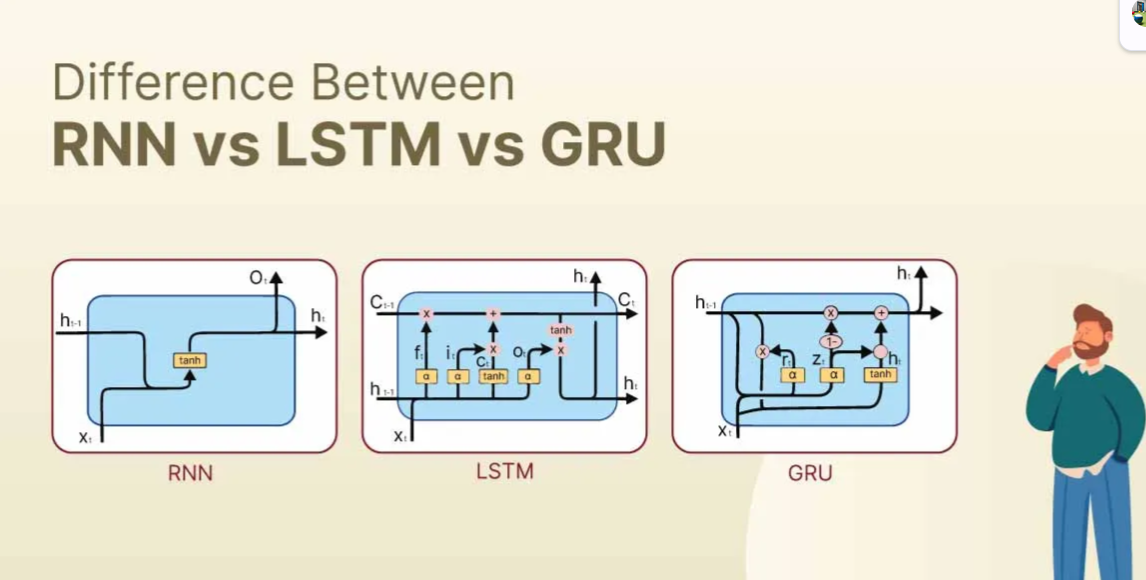